## Feature Scaling wiht the help of sklean
1. StandardScaler
2. MinMaxScaler

###### Importing Libraries

In [53]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

###### Importing DataSet

In [3]:
df = sns.load_dataset("titanic")

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
df_num = df.select_dtypes(include=["int64"])

In [12]:
df_num.shape

(891, 4)

In [13]:
df_num.columns

Index(['survived', 'pclass', 'sibsp', 'parch'], dtype='object')

In [17]:
X = df_num[['pclass', 'sibsp', 'parch']]
y = df_num['survived']

,pclass,sibsp,parch
0,3,1,0
1,1,1,0
2,3,0,0
3,1,1,0
4,3,0,0
...,...,...,...
886,2,0,0
887,1,0,0
888,3,1,2
889,1,0,0


###### Spliting DataSet

In [41]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2)

In [42]:
print(X_train.shape)   #traning
print(X_test.shape)    #testing
print(y_train.shape)   #train
print(y_test.shape)    #test

(712, 3)
(179, 3)
(712,)
(179,)


In [73]:
X_train.head()

,pclass,sibsp,parch
15,2,0,0
559,3,1,0
289,3,0,0
67,3,0,0
352,3,1,1


## StandardScaler

In [56]:
sc = StandardScaler()

In [57]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
sc.var_

array([0.68315041, 1.21542222, 0.59111657])

In [59]:
sc.mean_

array([2.31039326, 0.52949438, 0.375     ])

In [60]:
sc.scale_

array([0.82652913, 1.10246189, 0.76884106])

In [61]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [67]:
X_train_sc = pd.DataFrame(X_test_sc,columns=['pclass', 'sibsp', 'parch'])
X_test_sc = pd.DataFrame(X_test_sc,columns=['pclass', 'sibsp', 'parch'])

In [70]:
X_test_sc.describe().round(2)

,pclass,sibsp,parch
count,179.00,179.00,179.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-1.49,-0.45,-0.44
25%,-1.49,-0.45,-0.44
50%,0.80,-0.45,-0.44
75%,0.80,0.46,-0.44
max,0.80,6.82,4.90


In [71]:
X_train_sc.head()

,pclass,sibsp,parch
0,-1.494942,1.365676,-0.435141
1,0.802007,-0.451841,-0.435141
2,-1.494942,-0.451841,-0.435141
3,-1.494942,-0.451841,-0.435141
4,-1.494942,-0.451841,-0.435141


## MinMaxScaler

In [74]:
mms = MinMaxScaler()

In [76]:
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.fit_transform(X_test)

In [79]:
X_train_mms.var()

0.1463145449424321

In [80]:
X_train_mms.mean()

0.26129447565543074

In [81]:
X_train_mms = pd.DataFrame(X_train_mms,columns=['pclass', 'sibsp', 'parch'])
X_test_mms = pd.DataFrame(X_train_mms,columns=['pclass', 'sibsp', 'parch'])

In [83]:
X_train_mms.head()

,pclass,sibsp,parch
0,0.5,0.000,0.000000
1,1.0,0.125,0.000000
2,1.0,0.000,0.000000
3,1.0,0.000,0.000000
4,1.0,0.125,0.166667


#### Ploting Graph 

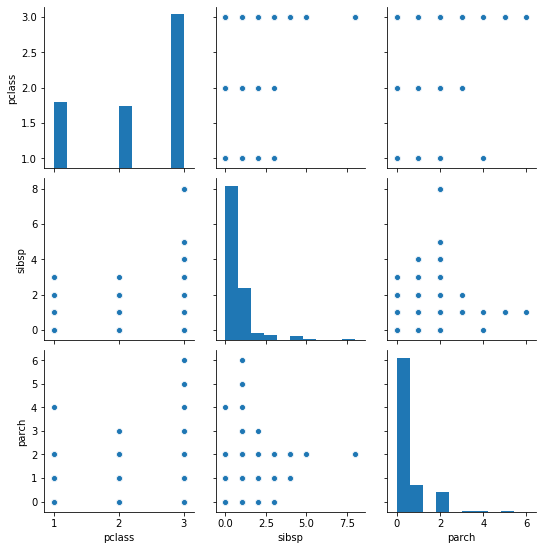

In [84]:
sns.pairplot(X_train)

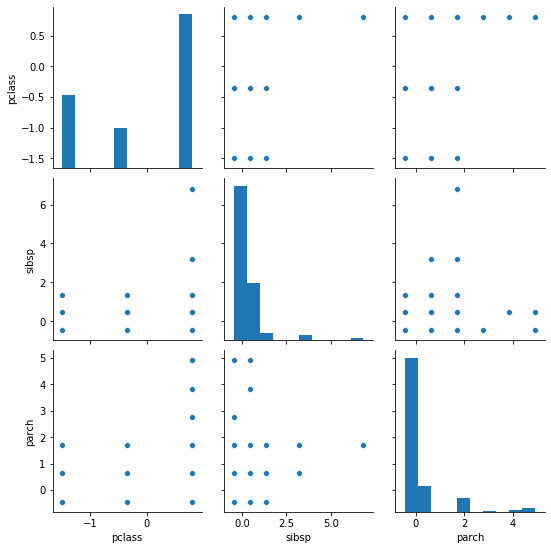

In [85]:
sns.pairplot(X_test_sc)

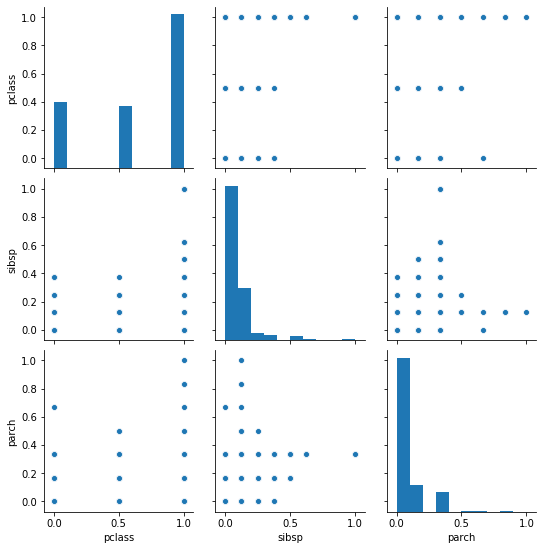

In [86]:
sns.pairplot(X_train_mms)